# Read Original Data

In [1]:
import time
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from tensorflow.keras import regularizers
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor

mpl.rcParams['figure.dpi']= 150

# Run XGBoost Interpolation

In [2]:
# Read all data and merge
thick_con_interpolated = []
for i in range(0,49):
    temp_df = pd.read_csv('Mult'+str(i))
    # print(i, temp_df.iloc[:,2].values)
    thick_con_interpolated.append(temp_df.iloc[:,2].values)

In [3]:
# Transpose to match the format
thick_con_interpolated = np.transpose(np.array(thick_con_interpolated))

In [4]:
# Call the pickled model
import pickle
gbm = pickle.load(open('finalized_model_RF.sav', 'rb'))

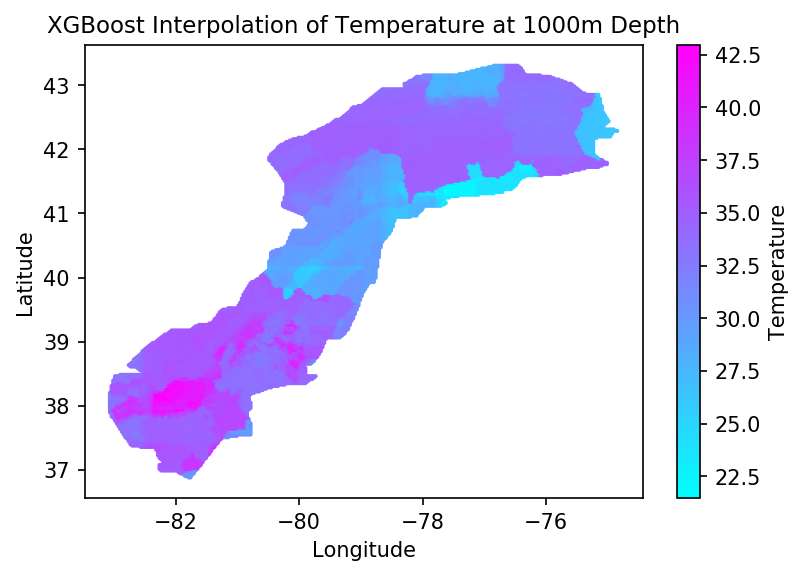

In [8]:
z_guess = 1000 # Give your z, 500~3000
df_interpolated = pd.DataFrame({'lat':temp_df.iloc[:,1].values,'lon':temp_df.iloc[:,0].values,
                                'z':np.full((len(temp_df.iloc[:,0].values),),z_guess),
                                't_surf':pd.read_csv('T_surf_knn').iloc[:,2].values}) # z is all z guess
X_interpolated = np.concatenate((df_interpolated.values,thick_con_interpolated),axis=1)
X_interpolated.shape
# Run the training code above first.
xgb_pred = gbm.predict(X_interpolated)
#dnn_pred = model.predict(X_interpolated)


#Visalization
plt.scatter(df_interpolated.lon, df_interpolated.lat,
            c=xgb_pred, cmap='cool',s=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('XGBoost Interpolation of Temperature at '+str(z_guess)+'m Depth', fontsize=11)
#plt.clim(290-273,380-273)
#plt.colorbar().set_clim(290,380)
plt.colorbar().set_label('Temperature')
plt.show()

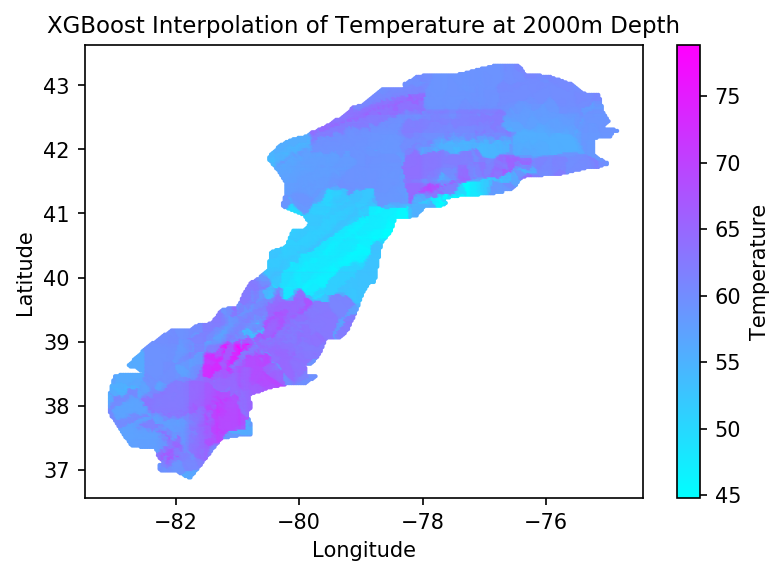

In [7]:
z_guess = 2000 # Give your z, 500~3000
df_interpolated = pd.DataFrame({'lat':temp_df.iloc[:,1].values,'lon':temp_df.iloc[:,0].values,
                                'z':np.full((len(temp_df.iloc[:,0].values),),z_guess),
                                't_surf':pd.read_csv('T_surf_knn').iloc[:,2].values}) # z is all z guess
X_interpolated = np.concatenate((df_interpolated.values,thick_con_interpolated),axis=1)
X_interpolated.shape
# Run the training code above first.
xgb_pred = gbm.predict(X_interpolated)
#dnn_pred = model.predict(X_interpolated)


#Visalization
plt.scatter(df_interpolated.lon, df_interpolated.lat,
            c=xgb_pred, cmap='cool',s=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('XGBoost Interpolation of Temperature at '+str(z_guess)+'m Depth', fontsize=11)
#plt.clim(290-273,380-273)
#plt.colorbar().set_clim(290,380)
plt.colorbar().set_label('Temperature')
plt.show()

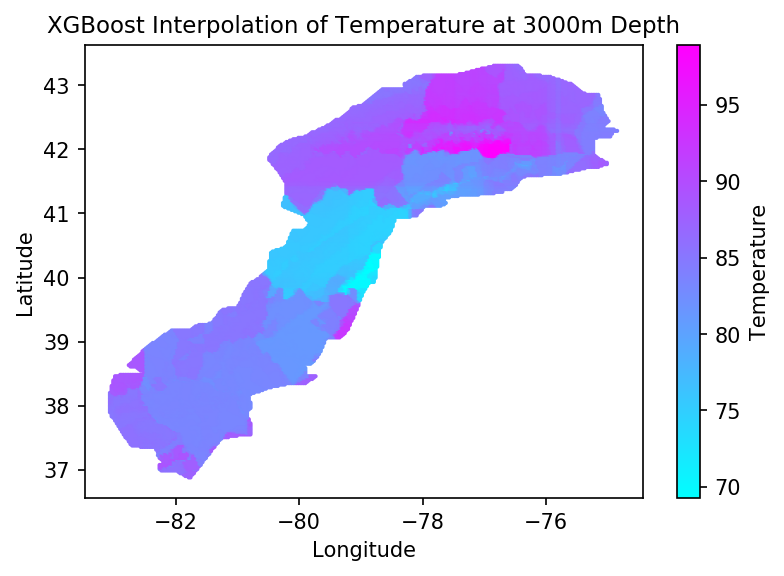

In [6]:
z_guess = 3000 # Give your z, 500~3000
df_interpolated = pd.DataFrame({'lat':temp_df.iloc[:,1].values,'lon':temp_df.iloc[:,0].values,
                                'z':np.full((len(temp_df.iloc[:,0].values),),z_guess),
                                't_surf':pd.read_csv('T_surf_knn').iloc[:,2].values}) # z is all z guess
X_interpolated = np.concatenate((df_interpolated.values,thick_con_interpolated),axis=1)
X_interpolated.shape
# Run the training code above first.
xgb_pred = gbm.predict(X_interpolated)
#dnn_pred = model.predict(X_interpolated)


#Visalization
plt.scatter(df_interpolated.lon, df_interpolated.lat,
            c=xgb_pred, cmap='cool',s=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('XGBoost Interpolation of Temperature at '+str(z_guess)+'m Depth', fontsize=11)
#plt.clim(290-273,380-273)
#plt.colorbar().set_clim(290,380)
plt.colorbar().set_label('Temperature')
plt.show()

# RF Interpolation

In [9]:
rf = pickle.load(open('finalized_model_RF.sav', 'rb'))

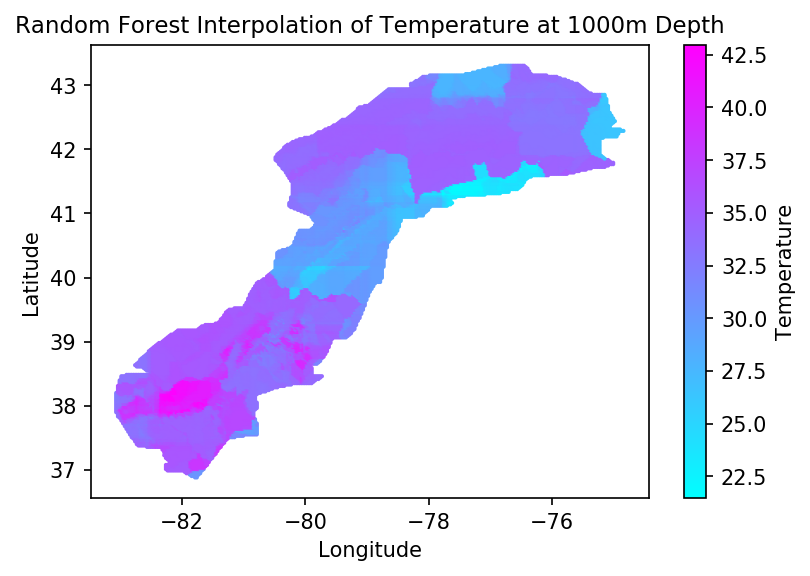

In [13]:
z_guess = 1000 # Give your z, 500~3000
df_interpolated = pd.DataFrame({'lat':temp_df.iloc[:,1].values,'lon':temp_df.iloc[:,0].values,
                                'z':np.full((len(temp_df.iloc[:,0].values),),z_guess),
                                't_surf':pd.read_csv('T_surf_knn').iloc[:,2].values}) # z is all z guess
X_interpolated = np.concatenate((df_interpolated.values,thick_con_interpolated),axis=1)
X_interpolated.shape
# Run the training code above first.
xgb_pred = rf.predict(X_interpolated)
#dnn_pred = model.predict(X_interpolated)


#Visalization
plt.scatter(df_interpolated.lon, df_interpolated.lat,
            c=xgb_pred, cmap='cool',s=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Random Forest Interpolation of Temperature at '+str(z_guess)+'m Depth', fontsize=11)
#plt.clim(290-273,380-273)
#plt.colorbar().set_clim(290,380)
plt.colorbar().set_label('Temperature')
plt.show()

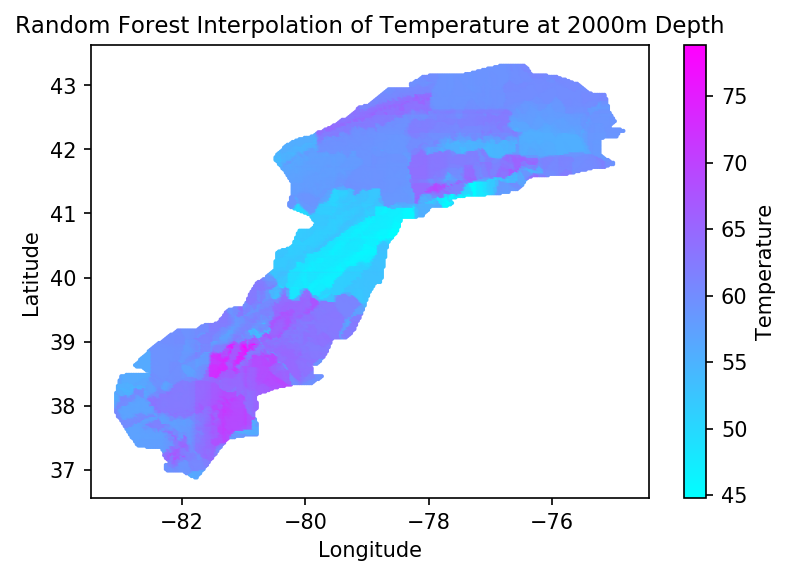

In [14]:
z_guess = 2000 # Give your z, 500~3000
df_interpolated = pd.DataFrame({'lat':temp_df.iloc[:,1].values,'lon':temp_df.iloc[:,0].values,
                                'z':np.full((len(temp_df.iloc[:,0].values),),z_guess),
                                't_surf':pd.read_csv('T_surf_knn').iloc[:,2].values}) # z is all z guess
X_interpolated = np.concatenate((df_interpolated.values,thick_con_interpolated),axis=1)
X_interpolated.shape
# Run the training code above first.
xgb_pred = rf.predict(X_interpolated)
#dnn_pred = model.predict(X_interpolated)


#Visalization
plt.scatter(df_interpolated.lon, df_interpolated.lat,
            c=xgb_pred, cmap='cool',s=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Random Forest Interpolation of Temperature at '+str(z_guess)+'m Depth', fontsize=11)
#plt.clim(290-273,380-273)
#plt.colorbar().set_clim(290,380)
plt.colorbar().set_label('Temperature')
plt.show()

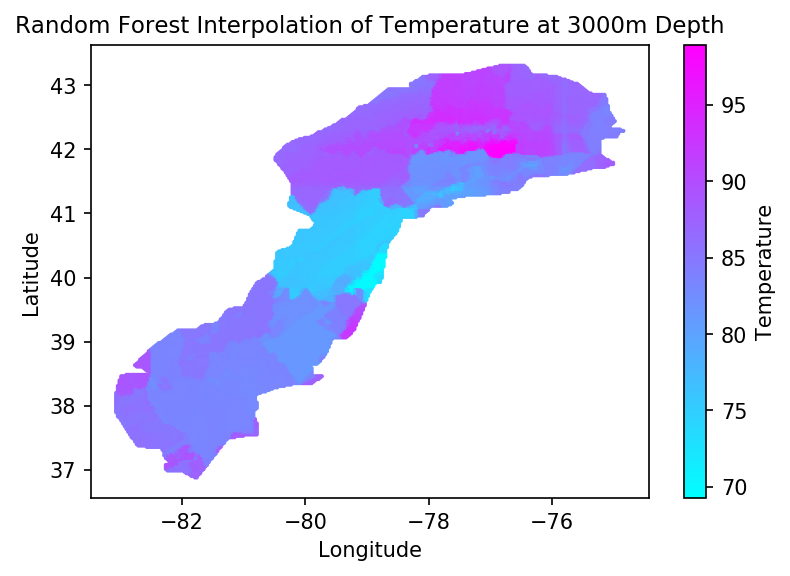

In [15]:
z_guess = 3000 # Give your z, 500~3000
df_interpolated = pd.DataFrame({'lat':temp_df.iloc[:,1].values,'lon':temp_df.iloc[:,0].values,
                                'z':np.full((len(temp_df.iloc[:,0].values),),z_guess),
                                't_surf':pd.read_csv('T_surf_knn').iloc[:,2].values}) # z is all z guess
X_interpolated = np.concatenate((df_interpolated.values,thick_con_interpolated),axis=1)
X_interpolated.shape
# Run the training code above first.
xgb_pred = rf.predict(X_interpolated)
#dnn_pred = model.predict(X_interpolated)


#Visalization
plt.scatter(df_interpolated.lon, df_interpolated.lat,
            c=xgb_pred, cmap='cool',s=1)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Random Forest Interpolation of Temperature at '+str(z_guess)+'m Depth', fontsize=11)
#plt.clim(290-273,380-273)
#plt.colorbar().set_clim(290,380)
plt.colorbar().set_label('Temperature')
plt.show()